In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,f1_score, recall_score, precision_recall_curve

In [2]:
datapath="/Users/zhangyuanzhuo/425 ML/Weekly.csv"
data = pd.read_csv(datapath, header=0)
data['Direction_num'] = data['Direction'] == 'Up'
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


Optimization terminated successfully.
         Current function value: 0.686896
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction_num   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:               9.505e-05
Time:                        10:39:00   Log-Likelihood:                -748.03
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9996
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0327      0.026     -1.250      0.211      -0.084       0.019
Lag2           0.0682      0.

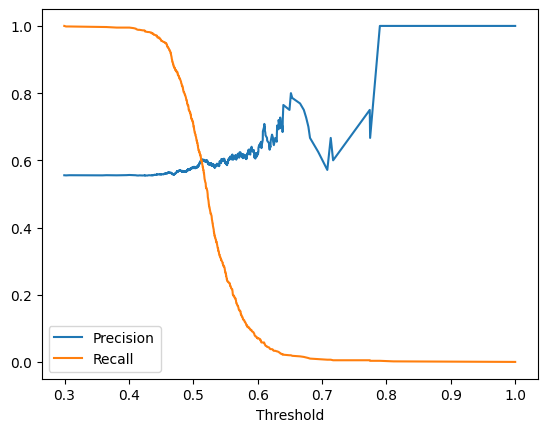

In [3]:
# logit regression with full data:
X_train = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
Y_train = data['Direction_num']
model = Logit(Y_train, X_train).fit()
print(model.summary())
Y_pred_raw = model.predict(X_train)
Y_pred_label = Y_pred_raw >= 0.5
confusion_matrix(Y_train, Y_pred_label)
print('Precision = ', precision_score(Y_train, Y_pred_label))
print('Recall = ', recall_score(Y_train, Y_pred_label))
print('F1-score = ', f1_score(Y_train, Y_pred_label))
print('Accuracy = ', accuracy_score(Y_train, Y_pred_label))
prec, rec, thresholds = precision_recall_curve(Y_train, Y_pred_raw)
plt.plot(np.append(thresholds,1), prec, label='Precision')
plt.plot(np.append(thresholds,1), rec, label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [4]:
# logit regression with 1990-2008 data and Lag2 only:
data_08 = data[(data['Year'] >= 1990) & (data['Year'] <= 2008)]
Y_train_08 = data_08['Direction_num']
X_train_08 = data_08['Lag2']
model = Logit(Y_train_08, X_train_08).fit()
print(model.summary())
data_test = data[(data['Year'] > 2008)]
X_test = data_test['Lag2']
Y_test = data_test['Direction_num']
Y_test_pred_raw = model.predict(X_test)
Y_test_pred_label = Y_test_pred_raw >= 0.5
confusion_matrix(Y_test, Y_test_pred_label)
print('Precision = ', precision_score(Y_test, Y_test_pred_label))
print('Recall = ', recall_score(Y_test, Y_test_pred_label))
print('F1-score = ', f1_score(Y_test, Y_test_pred_label))
print('Accuracy = ', accuracy_score(Y_test, Y_test_pred_label))

Optimization terminated successfully.
         Current function value: 0.690654
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction_num   No. Observations:                  985
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                            0
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:               -0.004340
Time:                        10:39:00   Log-Likelihood:                -680.29
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag2           0.0629      0.029      2.192      0.028       0.007       0.119
Precision =  0.61666666666666